<a href="https://colab.research.google.com/github/nightKnight112/Bin_with_a_Brain/blob/main/Model_p_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Waste Classification Model built on CNNs and Transfer Learning(InceptionV3)

Importing the necessary libraries required

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

import keras
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Activation
from keras.layers import Dropout, Dense, Flatten, BatchNormalization

**Data**

The dataset contains images divided into two classes: organic waste and recycle waste and it is split into train data (85%) and test data (15%). Training dataset contains 22564 images while test dataset 2513 images. The data is imported into the colab from [here](https://www.kaggle.com/datasets/techsash/waste-classification-data) as archive(1).zip

**The Train and Validation splits of the dataset at 85% and 15%, hence we divide the validation dataset into validation and test dataset with split_value=0.1**

extracting the dataset from a zip file

In [22]:
from zipfile import ZipFile
zf = ZipFile('/content/drive/MyDrive/archive (1).zip', 'r')
zf.extractall()
zf.close()

Test and Train dir for model building

In [23]:
train_dir = '/content/dataset/DATASET/TRAIN'
test_dir = '/content/dataset/DATASET/TEST'

**Data augumentation**

We use ImageDataGenerator to create a transformation that rescales the images and applied data augmentation as well. We generate augumentation only for train data while validation data are only rescaling ones.

Keras **ImageDataGenerator** class is used which provides a quick and easy way to label all of our images based on the directories they are in. Also, it provides many of different augmentation techniques like standardization, shifts, rotation, flips, brightness change etc.

In [24]:
train_datagen = ImageDataGenerator(rotation_range=10,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip = True,
                                   rescale=1./255
                                   )


val_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.1) #rescaling for normalization of image features

Now we set our dataset into train, test and validation data.

We use the flow_from_directory() method which allows to read the images directly from the directory and augment them while the neural network model is learning on the training data.

In [25]:
Batch_size = 32  # we can also take the batch size at 64, but taking 32 as the batch size provides the most optimal methods

train_set = train_datagen.flow_from_directory(train_dir, class_mode='binary',
                                              batch_size = Batch_size,
                                              target_size=(150, 150)) #flow_from_directory func takes the directory name as the label and labels all the imgs in it
                                              #initial img input into network is 64 * 64 * 3


val_set = val_datagen.flow_from_directory(test_dir, class_mode='binary',
                                          batch_size = Batch_size,
                                          target_size=(150, 150),
                                          subset= 'training')
   

test_set = val_datagen.flow_from_directory(test_dir, class_mode = 'binary',
                                           batch_size = Batch_size, 
                                           target_size=(150, 150),
                                           subset= 'validation')

Found 22564 images belonging to 2 classes.
Found 2262 images belonging to 2 classes.
Found 251 images belonging to 2 classes.


**Class Indices(binary classification)**

1.   0 for Organic/Biodegradable Waste
2.   1 for Recyclable/Non-Biodegradable Waste



In [26]:
train_set.class_indices

{'O': 0, 'R': 1}

In [27]:
train_set.image_shape

(150, 150, 3)

**Model Creation**

We have created an architecture for our Convolutional Neural Network (CNN) model. The architecture is simple and consists of three Convolutional layers and two fully connected layers.

We have used **binary_crossentropy** as the loss function, However **RMsprop** could also be used as it allows us to tune the learning rate for the model

In [30]:
model = Sequential([                
  Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(150, 150, 3)), 
  MaxPool2D((2,2)),
  Conv2D(32, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Conv2D(64, (3,3), activation='relu', padding='same'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(units=128, activation="relu"),
  Dense(units=1, activation="sigmoid")
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 18, 18, 64)      

**Model Training**

In [31]:
history = model.fit(
    train_set,
    epochs = 5,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
) #we use only 5 epochs after some training as we see value loss increasing and accuracy decreasing, which serves as a eye-opener for the success of our next model

Epoch 1/5
22/22 [==============================] - 47s 2s/step - loss: 0.7163 - accuracy: 0.6080 - val_loss: 0.5282 - val_accuracy: 0.8404
Epoch 2/5
22/22 [==============================] - 47s 2s/step - loss: 0.5133 - accuracy: 0.7599 - val_loss: 0.4562 - val_accuracy: 0.8426
Epoch 3/5
22/22 [==============================] - 49s 2s/step - loss: 0.4851 - accuracy: 0.7855 - val_loss: 0.4066 - val_accuracy: 0.8492
Epoch 4/5
22/22 [==============================] - 52s 2s/step - loss: 0.4683 - accuracy: 0.8125 - val_loss: 0.4254 - val_accuracy: 0.8488
Epoch 5/5
22/22 [==============================] - 52s 2s/step - loss: 0.4233 - accuracy: 0.8253 - val_loss: 0.3968 - val_accuracy: 0.8568


***Plotting the accuracy and loss graphs***

In [32]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

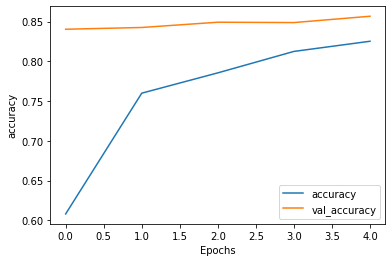

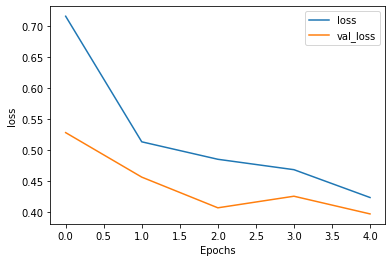

In [33]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Accuracy in %: ", accuracy*100)

Testing Accuracy:  0.9363
Accuracy in %:  93.62549781799316


**Alternate Model(built for better accuracy)**

In this model we add additional convolution layers alongwith maxpooling layers and reduce the complexity of architecture in fully connected layer.

In [38]:
model2 = Sequential([
   Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
   MaxPool2D((2,2)),
   Conv2D(32, (3,3), activation='relu'),
   MaxPool2D((2,2)),
   Conv2D(64, (3,3), activation='relu'),
   MaxPool2D((2,2)),
   Conv2D(128, (3,3), activation='relu'),
   MaxPool2D((2,2)),
   Flatten(),
   Dense(64, activation="relu"),
   Dense(32, activation="relu"),
   Dense(1, activation="sigmoid")
])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 64)      

**Model Training**

In [39]:
history_2 = model2.fit(
    train_set,
    epochs =15,
    validation_data= val_set,
    steps_per_epoch=int(len(train_set)/Batch_size),
    verbose=1
)

Epoch 1/15
22/22 [==============================] - 48s 2s/step - loss: 0.6562 - accuracy: 0.5866 - val_loss: 0.4787 - val_accuracy: 0.7790
Epoch 2/15
22/22 [==============================] - 46s 2s/step - loss: 0.5374 - accuracy: 0.7571 - val_loss: 0.5487 - val_accuracy: 0.7162
Epoch 3/15
22/22 [==============================] - 46s 2s/step - loss: 0.4968 - accuracy: 0.7798 - val_loss: 0.3967 - val_accuracy: 0.8501
Epoch 4/15
22/22 [==============================] - 46s 2s/step - loss: 0.4480 - accuracy: 0.8026 - val_loss: 0.5015 - val_accuracy: 0.8077
Epoch 5/15
22/22 [==============================] - 48s 2s/step - loss: 0.4474 - accuracy: 0.7926 - val_loss: 0.4146 - val_accuracy: 0.8179
Epoch 6/15
22/22 [==============================] - 46s 2s/step - loss: 0.4622 - accuracy: 0.7841 - val_loss: 0.3970 - val_accuracy: 0.8475
Epoch 7/15
22/22 [==============================] - 46s 2s/step - loss: 0.4769 - accuracy: 0.7727 - val_loss: 0.3836 - val_accuracy: 0.8515
Epoch 8/15
22/22 [==

***Plotting the accuracy and loss graphs***

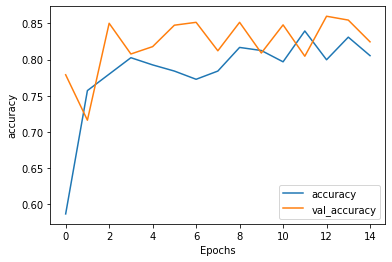

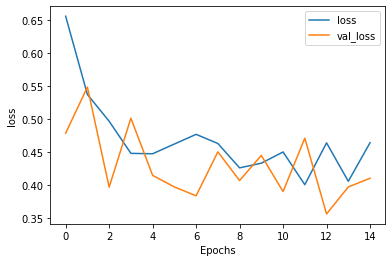

In [40]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_2, "accuracy")
plot_graphs(history_2, "loss")

In [41]:
loss, accuracy = model2.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Accuracy in %: ", accuracy*100)

Testing Accuracy:  0.8924
Accuracy in %:  89.2430305480957


**Alternate Model 2(built for better accuracy)**

In this model we explore Transfer Learning(InceptionV2), take the output of the 'mixed7' layer and add dense layers at its output alongwith a dropout layer

**Downloading the InceptionV2 model weights**

In [42]:
# Download the pre-trained weights. No top means it excludes the fully connected layer it uses for classification.
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2022-11-27 04:18:24--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.211.128, 173.194.212.128, 173.194.213.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.211.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   189MB/s    in 0.4s    

2022-11-27 04:18:25 (189 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



**Modifying the model as to reduce training time and utilize the models pre trained layers**

In [43]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5' #edit

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

**Model Summary**

In [44]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_25[0][0]']              
 alization)                                                                                       
                                                                                       

**Adding Dense layers with a Dropout to get the best output**

In [45]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


**Final model architecture**

In [46]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense (1, activation='sigmoid')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_25 (Conv2D)             (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_25[0][0]']              
 alization)                                                                                       
                                                                                              

**Training the model**

In [47]:
model.compile(optimizer = RMSprop(learning_rate=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])
history_3 = model.fit(
            train_set,
            validation_data = val_set,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 254s - loss: 0.3834 - accuracy: 0.8452 - val_loss: 0.4337 - val_accuracy: 0.8375 - 254s/epoch - 3s/step
Epoch 2/20
100/100 - 230s - loss: 0.3018 - accuracy: 0.8825 - val_loss: 0.3720 - val_accuracy: 0.8619 - 230s/epoch - 2s/step
Epoch 3/20
100/100 - 230s - loss: 0.2589 - accuracy: 0.9003 - val_loss: 0.3868 - val_accuracy: 0.8656 - 230s/epoch - 2s/step
Epoch 4/20
100/100 - 231s - loss: 0.2661 - accuracy: 0.8978 - val_loss: 0.3716 - val_accuracy: 0.8806 - 231s/epoch - 2s/step
Epoch 5/20
100/100 - 235s - loss: 0.2557 - accuracy: 0.9056 - val_loss: 0.3084 - val_accuracy: 0.8963 - 235s/epoch - 2s/step
Epoch 6/20
100/100 - 230s - loss: 0.2679 - accuracy: 0.9072 - val_loss: 0.2699 - val_accuracy: 0.8988 - 230s/epoch - 2s/step
Epoch 7/20
100/100 - 230s - loss: 0.2517 - accuracy: 0.9091 - val_loss: 0.3144 - val_accuracy: 0.9006 - 230s/epoch - 2s/step
Epoch 8/20
100/100 - 230s - loss: 0.2573 - accuracy: 0.9125 - val_loss: 0.3053 - val_accuracy: 0.9031 - 230s/epoch - 2s/step


**Plotting the loss and accuracy**

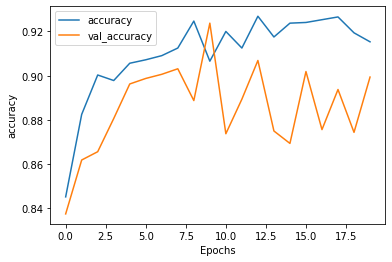

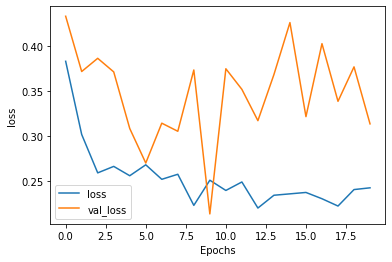

In [48]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history_3, "accuracy")
plot_graphs(history_3, "loss")

**Testing the model on the test state**

In [49]:
loss, accuracy = model.evaluate(test_set, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Accuracy in %: ", accuracy*100)

Testing Accuracy:  0.9562
Accuracy in %:  95.61753273010254


**We conclude that,**

Model1 has a testing accuracy of 93.61%

Model2 has a testing accuracy of 89.02% 

Model3 has a testing accuracy of 95.62%

**Hence, we apply model3 as our base model while designing the application**

Saving the model for further reference

In [63]:
model.save("bin_witha_brain_modelf.h5") #model3

**Testing the model's prediction against a custom image**

*Image Visualization and model testing*

In [56]:
# adding the image path 
test_image = tf.keras.utils.load_img('/content/download.jpg', target_size = (150, 150))

290 174 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>


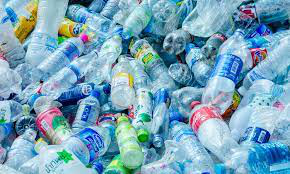

In [57]:
import PIL
im=Image.open('/content/download.jpg')
print(im.width, im.height, im.mode, im.format, type(im))
display(im)

In [58]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# prediction
result = model.predict(test_image)

1/1 [==============================] - 1s 1s/step


In [59]:
# dataset class index
train_set.class_indices

{'O': 0, 'R': 1}

In [60]:
print(result) #returning the label of the prediction made

[[1.]]


In [61]:
if result[0][0] == 1:
    prediction = 'Recyclable/Non-Biodegradable Waste'
elif result[0][0] == 0:
    prediction = 'Organic/Biodegradable Waste'
else:
  print("Invalid Output")

In [62]:
print(prediction)

Recyclable/Non-Biodegradable Waste
